<a href="https://colab.research.google.com/github/as2c/MLP---Cosmology/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# **Import Data**
To analyze the formation of halo dark matter in the present universe, we have used the "Virgo-Millennium" database, in which Saba Etezad Razavi and her colleagues have made some significant changes in the rare form of data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
huge_data =  pd.read_csv('/content/drive/MyDrive/multiclass_labeling_full_information.csv')
huge_data.head()

,Unnamed: 0,snapnum,phkey,x,y,z,vx,vy,vz,id,In_halo,halo_mass,log_mass,In_halo_log
0,0,0,0,0.079177,0.003392,0.416711,6.259036,-202.86237,43.663280,1,0.0,1,0.000000,0
1,1,0,0,0.289189,0.130278,0.456327,7.491590,-184.12308,35.697285,2,24.0,25323,4.403515,34
2,2,0,0,0.262699,0.197281,0.224564,32.359110,-205.89218,91.230120,3,0.0,1,0.000000,0
3,3,0,0,0.240575,0.396040,0.038927,67.365524,-224.21112,142.792710,4,24.0,25323,4.403515,34
4,4,0,0,0.408888,0.367119,0.182086,-14.317771,-216.64820,106.450930,5,40.0,78803,4.896543,38


# **Data Contents**

The data set contains the data of a 603$h^{-3}Mpc^3$ box with about 20 million particles and 5kpc resolution at redshift z=127. 

These 2 GB data from" Millimil"  includes the position of each particle, its velocity vectors, particle ID, the Peano-Hilbert key (we do not need this information about particles, so we drop it.), halo's mass (the mass of potential halo, which includes the particle in the present universe.) in one snapshot, which is in redshift 127.

Data also include two other columns, which are "in-halo" and "in-halo-log". We do not need these pieces of information in our project, so we dropped them.

In [ ]:
narrower_data= huge_data.drop(['Unnamed: 0','phkey','In_halo','In_halo_log'], axis=1)
narrower_data.head()
data = np.array(narrower_data)
x = data[:,1]
y = data[:,2]
z = data[:,3]
vx = data[:,4]
vy = data[:,5]
vz = data[:,6]
greatness_v = np.sqrt(vx**2 + vy**2 + vz**2)

# **Dark Matter Haloes Mass Histogram**

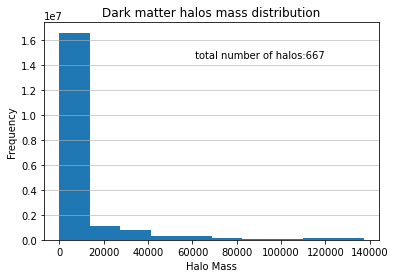

In [ ]:
n, bins, patches = plt.hist(x=narrower_data.halo_mass)
plt.grid(axis='y', alpha=0.75)
halo_set_size = len(np.unique(narrower_data.halo_mass))
plt.text(60000, 14500000, ' total number of halos:'+ str(halo_set_size))
plt.xlabel('Halo Mass')
plt.ylabel('Frequency')
plt.title('Dark matter halos mass distribution')

maxfreq = n.max()

# **Particles Distribution Over x, y, z axis**
# **Particles' Velocity Distribution Over x, y, z axis**

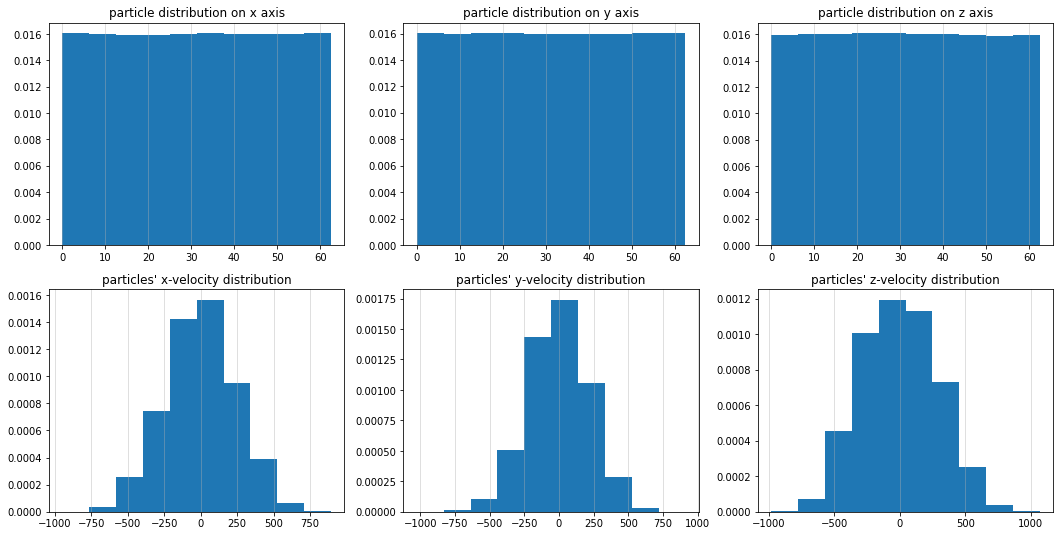

In [ ]:

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize= (18,9))

ax0.hist(x, density=True, histtype='bar')
ax0.set_title('particle distribution on x axis')
ax0.grid(axis='x', alpha=0.5)

ax1.hist(y, density=True, histtype='bar')
ax1.set_title('particle distribution on y axis')
ax1.grid(axis='x', alpha=0.5)

ax2.hist(z, density=True, histtype='bar')
ax2.set_title('particle distribution on z axis')
ax2.grid(axis='x', alpha=0.5)

ax3.hist(vx, density=True, histtype='bar')
ax3.set_title("particles' x-velocity distribution")
ax3.grid(axis='x', alpha=0.5)

ax4.hist(vy, density=True, histtype='bar')
ax4.set_title("particles' y-velocity distribution")
ax4.grid(axis='x', alpha=0.5)

ax5.hist(vz, density=True, histtype='bar')
ax5.set_title("particles' z-velocity distribution")
ax5.grid(axis='x', alpha=0.5)

The particle velocity histogram shows that their distribution looks like a gaussian distribution. However, as we expected, there is no sign of the correlation between velocity and position of particles. 

# **Particle Distribution Figure**

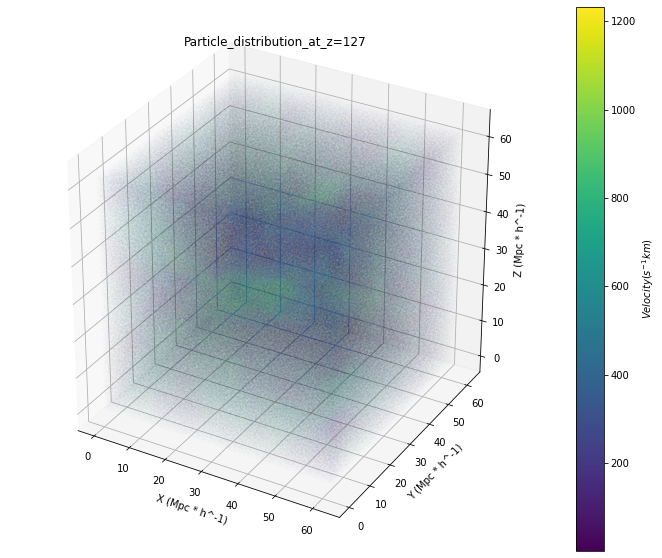

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
title = 'Particle_distribution_at_z=127'
ax.set_title(title)
p = ax.scatter(x[0::10], y[0::10], z[0::10], s = 0.0001 , c = greatness_v[0::10])
ax.set_xlabel('X (Mpc * h^-1)')
ax.set_ylabel('Y (Mpc * h^-1)')
ax.set_zlabel('Z (Mpc * h^-1)')
cb = fig.colorbar(p)
cb.set_label('$Velocity (s^{-1} km)$')
cb.mappable.set_clim([min(greatness_v),max(greatness_v)])
fig.savefig(f'{title}.png')
plt.show()

As shown in figure , a homogeneous mass density field can be seen very well because redshift is large enough not to see any sign of structures yet.

# **Vector Field of Particles' Rescaled-Velocities**

## **3D Plot**

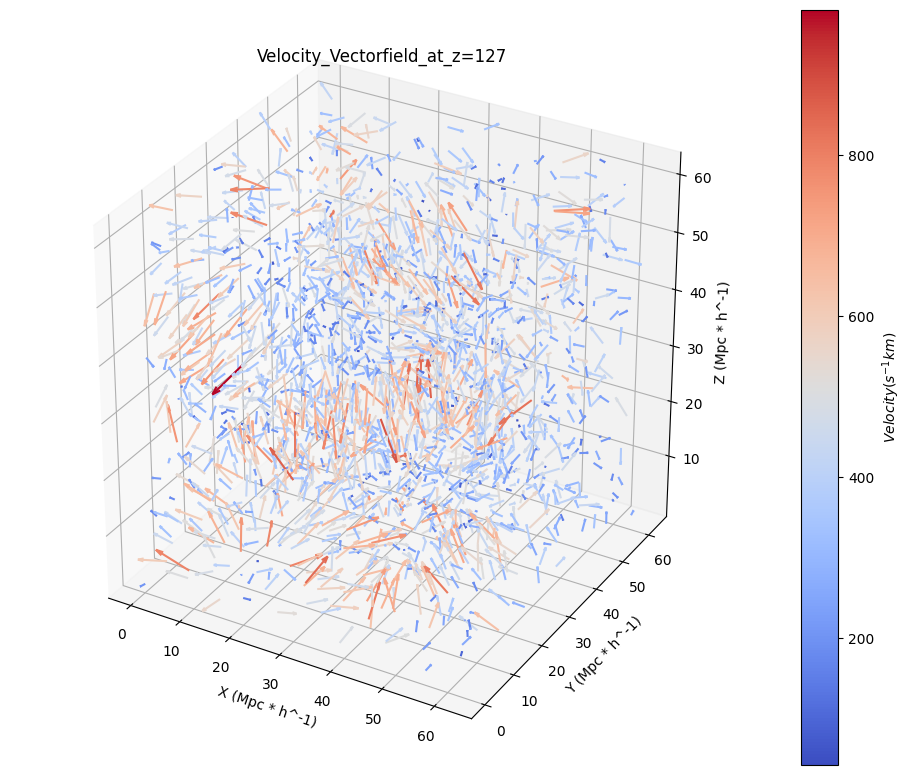

In [17]:
# Rescaling velocity for better appearence
vxn = vx/120
vyn = vy/120
vzn = vz/120

def vectorfield_3dplot(x, y, z, u, v, w, title):
    # Vector Magnitude : 
    a = np.sqrt(np.abs(v)**2 + np.abs(u)**2 + np.abs(w)**2)
    # Rescale to range [0,1]
    b = (a - a.min())/a.ptp()
    # Repeat for each body line and two arrow heads
    c = np.concatenate((b, np.repeat(b, 2)))
    # Colormap
    c = plt.cm.coolwarm(c)

    fig = plt.figure(figsize=(12,10),dpi = 100)
    ax = fig.gca(projection = '3d')
    ax.set_title(title)
    ax.set_xlabel('X (Mpc * h^-1)')
    ax.set_ylabel('Y (Mpc * h^-1)')
    ax.set_zlabel('Z (Mpc * h^-1)')
    
    p =ax.quiver(x, y, z, u, v, w, colors = c, arrow_length_ratio = 0.2, cmap=plt.cm.coolwarm)
    colorbar = fig.colorbar(cm.ScalarMappable(cmap=plt.cm.coolwarm))
    colorbar.mappable.set_clim(vmin=min(a*120),vmax=max(a*120))
    colorbar.set_label('$Velocity (s^{-1} km)$')
    plt.show()

rate = 10000 
vectorfield_3dplot(x[0::rate],y[0::rate],z[0::rate],vxn[0::rate],vyn[0::rate],vzn[0::rate], 'Velocity_Vectorfield_at_z=127')

##**2D Plot of a Slice**

A 2-dimensional view of the velocity vector field of articles with position $Z > 62.35$

(47042, 10)


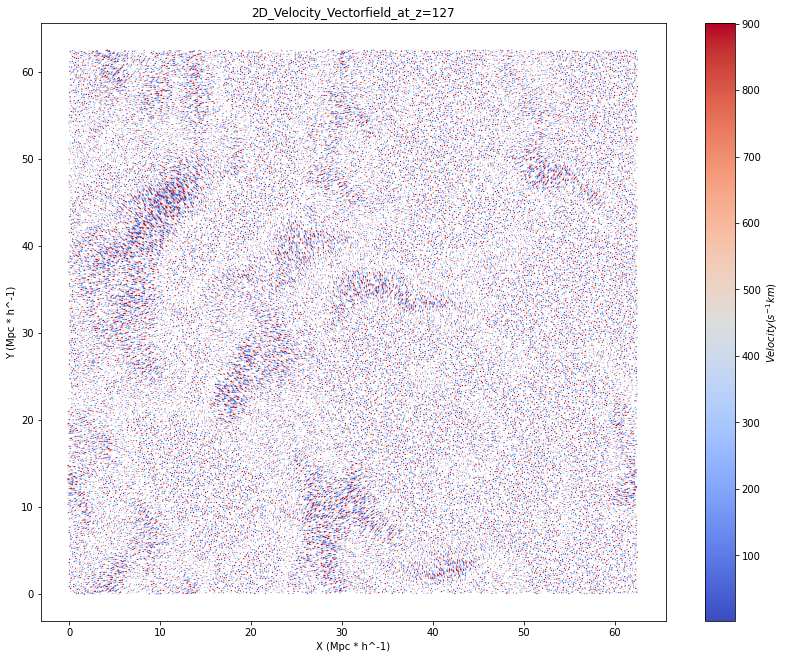

In [ ]:
# Finding Particles with position Z > 62.35
td_data = narrower_data[narrower_data["z"] > 62.35]
print(td_data.shape)
td = np.array(td_data)

# Getting X and Y Positions ans Velocities and Rescaling
td_x = np.array(td[:,1])
td_y = np.array(td[:,2])
td_vx = np.array(td[:,4]/120)
td_vy = np.array(td[:,5]/120)

fig = plt.figure(figsize=(14,11))
ax = fig.add_subplot(111)
rate = 10000

# Vector Magnitude:
greatness_v = np.sqrt(td_vx**2 + td_vy**2)

# Colormap and Normalize
cmap = cm.coolwarm
cNorm  = Normalize(vmin=np.min(greatness_v[0::rate]), vmax=np.max(greatness_v[0::rate]))
scalarMap = cm.ScalarMappable(norm=cNorm,cmap=cmap)
colorVal = scalarMap.to_rgba(greatness_v[0::rate])

# Plot
title = '2D_Velocity_Vectorfield_at_z=127'
ax.set_title(title)
ax.set_xlabel('X (Mpc * h^-1)')
ax.set_ylabel('Y (Mpc * h^-1)')
ax.quiver(td_x,td_y,td_vx/120,td_vy/120,
          color=colorVal)

colorbar = fig.colorbar(cm.ScalarMappable(cmap=plt.cm.coolwarm))
colorbar.mappable.set_clim(vmin=min(greatness_v*120),vmax=max(greatness_v*120))
colorbar.set_label('$Velocity (s^{-1} km)$')
plt.show()